In [53]:
!pip install nltk

In [54]:
import nltk

In [55]:
pip install -U gensim

Requirement already up-to-date: gensim in c:\users\shubham\anaconda3\lib\site-packages (3.8.3)
Note: you may need to restart the kernel to use updated packages.


In [56]:
import gensim

In [73]:
from gensim.models import Word2Vec
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
%matplotlib inline
import re

paragraph = """I do not intend to say much tonight about the Princes, but I should be wronging them and should be wronging the Congress if I did not register my claim, not with the Round Table Conference but with the Princes. It is open to the Princes to give their terms on which they will join the Federation. I have appealed to them to make the path easy for those who inhabit the other part of India, and therefore, I can only make these suggestions for their favourable consideration, for their earnest consideration. I think that if they accepted, no matter what they are, but some fundamental rights as the common property of all India, and if they accepted that position and allowed those rights to be tested by the Court, which will be again of their own creation, and if they introduced elements – only elements – of representation on behalf of their subject, I think that they would have gone a long way to conciliate their subjects. They would have gone a long way to show to the world and to show to the whole of India that they are also fired with a democratic spirit, that they do not want to remain undiluted autocrats, but that they want to become constitutional monarch even as King George of Great Britain is.
An Autonomous Frontier Province : Let India get what she is entitled to and what she can really take, but whatever she gets, and whenever she gets it, let the Frontier Province get complete autonomy today. That Frontier will then be a standing demonstration to the whole of India, and therefore, the whole vote of the Congress will be given in favour of the Frontier Province getting provincial Autonomy tomorrow. Prime Minister, If you can possibly get your Cabinet to endorse the proposition that from tomorrow the Frontier Province becomes a full-fledged autonomous province, I shall then have a proper footing amongst the Frontier tribes and convince them to my assistance when those over the border cast an evil eye on India."""

In [74]:
text = re.sub(r'\\[[0-9]*\\]',' ',paragraph)
text = re.sub(r'\\s+',' ',text)
text = text.lower()
text = re.sub(r'\\d',' ',text)
text = re.sub(r'\\s+',' ',text)

In [75]:
sentences = nltk.sent_tokenize(text)
sentences

['i do not intend to say much tonight about the princes, but i should be wronging them and should be wronging the congress if i did not register my claim, not with the round table conference but with the princes.',
 'it is open to the princes to give their terms on which they will join the federation.',
 'i have appealed to them to make the path easy for those who inhabit the other part of india, and therefore, i can only make these suggestions for their favourable consideration, for their earnest consideration.',
 'i think that if they accepted, no matter what they are, but some fundamental rights as the common property of all india, and if they accepted that position and allowed those rights to be tested by the court, which will be again of their own creation, and if they introduced elements – only elements – of representation on behalf of their subject, i think that they would have gone a long way to conciliate their subjects.',
 'they would have gone a long way to show to the world

In [76]:
sent_word = [nltk.word_tokenize(sentence) for sentence in sentences]

In [77]:
sent_word

[['i',
  'do',
  'not',
  'intend',
  'to',
  'say',
  'much',
  'tonight',
  'about',
  'the',
  'princes',
  ',',
  'but',
  'i',
  'should',
  'be',
  'wronging',
  'them',
  'and',
  'should',
  'be',
  'wronging',
  'the',
  'congress',
  'if',
  'i',
  'did',
  'not',
  'register',
  'my',
  'claim',
  ',',
  'not',
  'with',
  'the',
  'round',
  'table',
  'conference',
  'but',
  'with',
  'the',
  'princes',
  '.'],
 ['it',
  'is',
  'open',
  'to',
  'the',
  'princes',
  'to',
  'give',
  'their',
  'terms',
  'on',
  'which',
  'they',
  'will',
  'join',
  'the',
  'federation',
  '.'],
 ['i',
  'have',
  'appealed',
  'to',
  'them',
  'to',
  'make',
  'the',
  'path',
  'easy',
  'for',
  'those',
  'who',
  'inhabit',
  'the',
  'other',
  'part',
  'of',
  'india',
  ',',
  'and',
  'therefore',
  ',',
  'i',
  'can',
  'only',
  'make',
  'these',
  'suggestions',
  'for',
  'their',
  'favourable',
  'consideration',
  ',',
  'for',
  'their',
  'earnest',
  'consi

In [78]:
for i in range(len(sent_word)):
       sent_word[i] = [word for word in sent_word[i]
                        if word not in stopwords.words('english')]
   

In [79]:
sent_word

[['intend',
  'say',
  'much',
  'tonight',
  'princes',
  ',',
  'wronging',
  'wronging',
  'congress',
  'register',
  'claim',
  ',',
  'round',
  'table',
  'conference',
  'princes',
  '.'],
 ['open', 'princes', 'give', 'terms', 'join', 'federation', '.'],
 ['appealed',
  'make',
  'path',
  'easy',
  'inhabit',
  'part',
  'india',
  ',',
  'therefore',
  ',',
  'make',
  'suggestions',
  'favourable',
  'consideration',
  ',',
  'earnest',
  'consideration',
  '.'],
 ['think',
  'accepted',
  ',',
  'matter',
  ',',
  'fundamental',
  'rights',
  'common',
  'property',
  'india',
  ',',
  'accepted',
  'position',
  'allowed',
  'rights',
  'tested',
  'court',
  ',',
  'creation',
  ',',
  'introduced',
  'elements',
  '–',
  'elements',
  '–',
  'representation',
  'behalf',
  'subject',
  ',',
  'think',
  'would',
  'gone',
  'long',
  'way',
  'conciliate',
  'subjects',
  '.'],
 ['would',
  'gone',
  'long',
  'way',
  'show',
  'world',
  'show',
  'whole',
  'india',
 

In [80]:
model = Word2Vec(sent_word, min_count=1)

words = model.wv.vocab

In [82]:
vector = model.wv['wronging']

print(vector)

[ 2.3015686e-03  3.6105653e-03  9.2361245e-04  4.0609273e-03
  4.1265097e-03 -4.1890154e-03  4.4246297e-03 -3.2934507e-03
  1.8475347e-03  3.4105239e-04 -4.2250557e-03 -1.9614859e-03
  1.8531265e-04 -6.2821811e-04 -3.8189415e-03 -4.7416454e-03
  2.9764487e-03 -1.9056055e-03 -2.6461978e-03 -3.0836710e-03
  1.4792329e-03  3.9478671e-03 -1.3159771e-03  1.7573572e-03
  3.1994004e-03 -2.4377073e-03 -2.9256216e-03  3.9549911e-04
  4.8511177e-03  4.3953172e-04 -4.1625546e-03 -1.7576573e-03
  2.3765222e-04 -3.5717075e-03 -4.4570095e-03  1.6534581e-03
  3.5433779e-03 -2.8073075e-03 -7.8752544e-04 -4.2781350e-03
  8.7707891e-04 -2.2642354e-03  5.9373118e-04  3.3971926e-03
 -4.7322218e-03 -4.6324455e-03 -8.6619041e-04 -2.2093609e-03
  4.0728739e-03  1.5094016e-03  2.3584261e-03  1.1285329e-03
 -2.7035144e-03  1.9664245e-03 -3.1066416e-03 -3.1491490e-03
  2.6123277e-03 -3.8645088e-03  1.3547719e-03 -1.4941226e-03
  2.3810181e-03  4.4390454e-04  4.8137461e-03 -1.5177429e-03
  3.7797116e-04  1.02207

In [83]:
similar = model.wv.most_similar('favourable',topn=20)

similar

[('proposition', 0.2499200999736786),
 ('complete', 0.15599548816680908),
 ('table', 0.1514788269996643),
 ('undiluted', 0.13250330090522766),
 ('whole', 0.13175028562545776),
 ('remain', 0.12629251182079315),
 ('autocrats', 0.1223563402891159),
 ('possibly', 0.11855924129486084),
 ('say', 0.11750012636184692),
 ('terms', 0.11731661111116409),
 ('much', 0.11454115808010101),
 ('congress', 0.10218395292758942),
 ('conciliate', 0.09872865676879883),
 ('provincial', 0.08910781145095825),
 ('cabinet', 0.08718594163656235),
 ('whatever', 0.08520223200321198),
 ('really', 0.07948709279298782),
 ('subjects', 0.07442069798707962),
 ('register', 0.07417400181293488),
 ('also', 0.07315642386674881)]

In [84]:
model.wv.similarity(w1='favourable',w2='consideration')

0.07127095

In [108]:
model.wv.similarity(w1='cabinet',w2='provincial')

-0.047428958

In [109]:
model.wv.similarity(w1='cabinet',w2='cabinet')

1.0

In [110]:
model.wv.similarity(w1='favourable',w2='favourable')

1.0

In [111]:
model.wv.similarity(w1='wronging',w2='claim')

0.11186278

In [117]:
model.wv.similarity(w1='appealed',w2='suggestions')

0.10397078

In [118]:
model.wv.similarity(w1='favourable',w2='consideration')

0.07127095

In [119]:
model.wv.similarity(w1='accepted',w2='matter')

-0.017336804

In [120]:
model.wv.similarity(w1='fundamental',w2='rights')

0.008109003

In [121]:
model.wv.similarity(w1='gone',w2='long')

0.058752194

In [123]:
model.wv.similarity(w1='world',w2='fired')

-0.13279796

In [124]:
model.wv.similarity(w1='democratic',w2='spirit')

0.13051325

In [131]:
model.wv.similarity(w1='autonomous',w2='proper')

-0.17073537

In [132]:
model.wv.similarity(w1='footing',w2='amongst')

0.023338065

In [133]:
model.wv.similarity(w1='tribes',w2='convince')

-0.1161085

In [135]:
model.wv.similarity(w1='assistance',w2='cast')

-0.09954083

In [136]:
model.wv.similarity(w1='evil',w2='eye')

0.007866338

In [137]:
model.wv.similarity(w1='intend',w2='tonight')

-0.003664825

In [138]:
model.wv.similarity(w1='accepted',w2='matter')

-0.017336804

In [89]:
model.wv.doesnt_match(["favourable","elements","wronging","consideration","fired","Great","Britain","India","Province","autonomy","demonstration","favour","Prime Minister","possibly","Cabinet","Princes","Congress","Federation","rights","Court","democratic"])

C:\Users\Shubham\Anaconda3\lib\site-packages\gensim\models\keyedvectors.py:877: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  vectors = vstack(self.word_vec(word, use_norm=True) for word in used_words).astype(REAL)


'rights'

C:\Users\Shubham\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


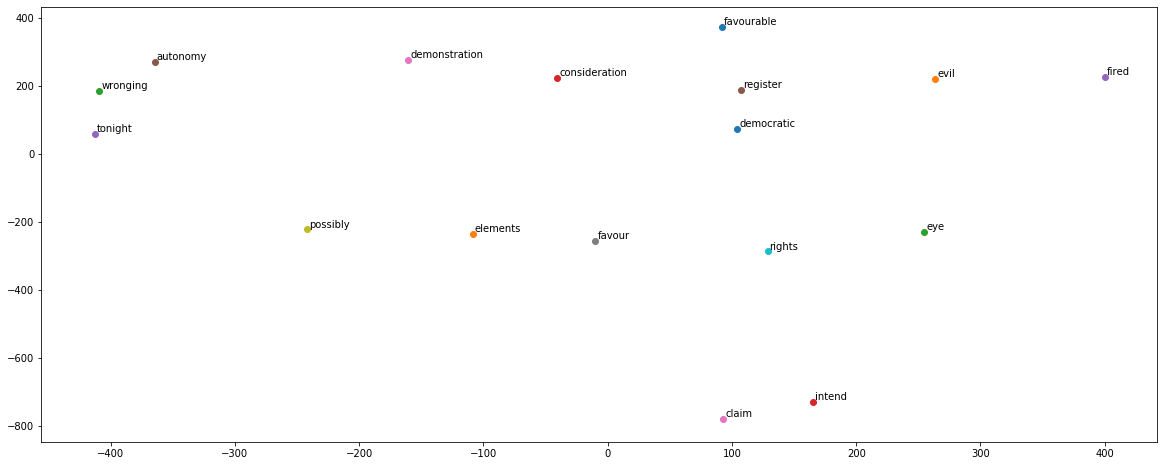

In [141]:
from sklearn.manifold import TSNE
vocab = ["favourable","elements","wronging","consideration","fired","autonomy","demonstration","favour","possibly" ,"rights" ,"democratic","evil","eye","intend","tonight","register","claim"]
def tsne_plot(model):
    labels = []
    wordvecs = []
    
    for word in vocab:
        wordvecs.append(model[word])
        labels.append(word)
    
    tsne_model = TSNE(perplexity=3, n_components=2, init='pca', random_state=42)
    coordinates = tsne_model.fit_transform(wordvecs)
    
    x = []
    y = []
    for value in coordinates:
        x.append(value[0])
        y.append(value[1])
    
    plt.figure(figsize=(20,8))
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(2, 2),
                     textcoords='offset points', ha='left')
    
    plt.show()

tsne_plot(model)
